169009152/169001437 [==============================] - 6s 0us/step
Epoch 1/100
   1/1563 [..............................] - ETA: 0s - loss: 4.6176 - accuracy: 0.0312 - precision: 0.0000e+00 - recall: 0.0000e+00WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1563/1563 [==============================] - 27s 17ms/step - loss: 4.6034 - accuracy: 0.0128 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.5995 - val_accuracy: 0.0104 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
1563/1563 [==============================] - 26s 17ms/step - loss: 4.5843 - accuracy: 0.0154 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.5323 - val_accuracy: 0.0229 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
1563/1563 [===========

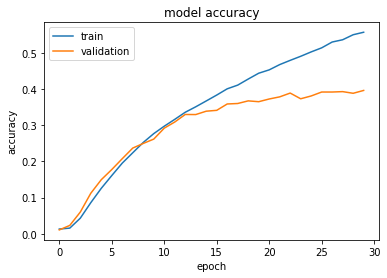

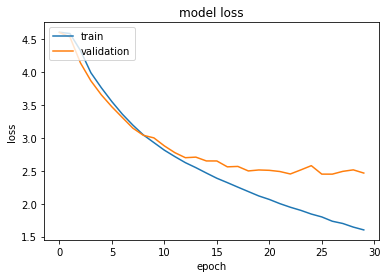

In [1]:
import tensorflow 
import tensorflow.keras
from keras.datasets import cifar100
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.activations import relu
from keras.metrics import Precision,Recall
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.models import Model
from datetime import datetime
import tensorboard
import keras

(x_train,y_train),(x_test,y_test)=cifar100.load_data()


es= EarlyStopping(monitor='val_loss', patience=3)
mc= ModelCheckpoint(filepath='InceptionV2_SGD_NoRegularization.h5', monitor='val_loss', save_best_only=True)

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

mean = x_train.mean()
std= x_train.std()
x_train=(x_train-mean)/std

mean = x_test.mean()
std= x_test.std()
x_test=(x_test-mean)/std

def module_1(x):


  conv1_1= Conv2D(8, (1, 1), padding='same',activation='relu')(x)
  conv1_2= Conv2D(16, (3, 3), padding='same',activation='relu')(conv1_1)
  conv1_3= Conv2D(16, (3, 3), padding='same')(conv1_2)

  conv2_1= Conv2D(16, (1, 1), padding='same',activation='relu')(x)
  conv2_2= Conv2D(32, (3, 3), padding='same')(conv2_1)
  
  conv3_1= Conv2D(8, (1, 1), padding='same')(x)

  maxpool4_1= MaxPooling2D(pool_size=(3,3),strides=1,padding='same')(x)
  conv4_2= Conv2D(8, (1, 1), padding='same')(maxpool4_1)

  return keras.layers.concatenate([conv1_3,conv2_2,conv3_1,conv4_2],axis=3)

def module_2(x):


  conv1_1= Conv2D(16, (1, 1), padding='same',activation='relu')(x)
  conv1_2= Conv2D(32, (1, 3), padding='same',activation='relu')(conv1_1)
  conv1_3= Conv2D(32, (3, 1), padding='same',activation='relu')(conv1_2)
  conv1_4= Conv2D(32, (1, 3), padding='same',activation='relu')(conv1_3)
  conv1_5= Conv2D(32, (3, 1), padding='same')(conv1_4)

  conv2_1= Conv2D(16, (1, 1), padding='same',activation='relu')(x)
  conv2_2= Conv2D(48, (3, 1), padding='same',activation='relu')(conv2_1)
  conv2_3= Conv2D(48, (1, 3), padding='same')(conv2_2)
  
  conv3_1= Conv2D(16, (1, 1), padding='same')(x)

  maxpool4_1= MaxPooling2D(pool_size=(3,3),strides=1,padding='same')(x)
  conv4_2= Conv2D(32, (1, 1), padding='same')(maxpool4_1)

  return keras.layers.concatenate([conv1_5,conv2_3,conv3_1,conv4_2])


def module_3(x):


  conv1_1= Conv2D(16, (1, 1), padding='same',activation='relu')(x)
  conv1_2= Conv2D(32, (3, 3), padding='same',activation='relu')(conv1_1)
  conv1_4= Conv2D(32, (1, 3), padding='same')(conv1_2)
  conv1_5= Conv2D(64, (3, 1), padding='same')(conv1_2)

  conv2_1= Conv2D(16, (1, 1), padding='same',activation='relu')(x)
  conv2_2= Conv2D(64, (3, 1), padding='same')(conv2_1)
  conv2_3= Conv2D(64, (1, 3), padding='same')(conv2_1)
  
  conv3_1= Conv2D(16, (1, 1), padding='same')(x)

  maxpool4_1= MaxPooling2D(pool_size=(3,3),strides=1,padding='same')(x)
  conv4_2= Conv2D(16, (1, 1), padding='same')(maxpool4_1)

  return keras.layers.concatenate([conv1_4,conv1_5,conv2_2,conv2_3,conv3_1,conv4_2])

def Inception_Model(input_shape): 

  inputs=Input(shape=[32,32,3])

  conv_1 = Conv2D(32, (3, 3), padding='same',strides=2, input_shape=(32,32,3))(inputs)
  relu_1 = Activation(relu)(conv_1)

  inception1=module_1(relu_1)
  relu_2= Activation(relu)(inception1)

  inception2=module_1(relu_2)
  relu_3= Activation(relu)(inception2)

  max_pool=  MaxPooling2D(pool_size=(2,2),padding='same')(relu_3)

  inception3=module_2(max_pool)
  relu_4= Activation(relu)(inception3)

  inception4=module_2(relu_4)
  relu_5= Activation(relu)(inception4)

  inception5=module_2(relu_5)
  relu_6= Activation(relu)(inception5)

  max_pool2=  MaxPooling2D(pool_size=(2,2),padding='same')(relu_6)

  inception4=module_3(max_pool2)
  relu_5= Activation(relu)(inception4)

  max_pool_final=  x = MaxPooling2D(pool_size=(2,2))(relu_5)
  flat= Flatten()(max_pool_final)
  dense= Dense(100,activation='softmax')(flat)

  model= Model( inputs=inputs, outputs =dense)
  return model

logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model = Inception_Model((32,32,3))

opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy',Precision(),Recall()])
history=model.fit(x=x_train,y=y_train,epochs=100, validation_data=(x_test,y_test), callbacks=[es,mc,tensorboard_callback])

from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [2]:
import keras 

(x_train,y_train),(x_test,y_test)=cifar100.load_data()
y_test=to_categorical(y_test)

mean = x_test.mean()
std= x_test.std()
x_test=(x_test-mean)/std


best_model= keras.models.load_model('InceptionV2_SGD_NoRegularization.h5')
_, acc,precision,recall = best_model.evaluate(x_test, y_test)

print("Accuracy: "+str(acc*100)+"%")
print("Precision: "+str(precision*100)+"%")
print("Recall: "+str(recall*100)+"%")

313/313 [==============================] - 2s 7ms/step - loss: 2.4482 - accuracy: 0.3923 - precision: 0.6445 - recall: 0.2478
Accuracy: 39.2300009727478%
Precision: 64.44733142852783%
Recall: 24.779999256134033%
